In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

In [62]:
df = pd.read_csv("CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [64]:
df.shape

(4340, 8)

In [66]:
missing_values = df.isnull().sum()
missing_values

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [68]:
for column in ['fuel', 'seller_type', 'transmission', 'owner', 'name']:
    df[column] = pd.Categorical(df[column]).codes

training_dataset = pd.get_dummies(df, drop_first=True)

training_dataset.head()



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,775,2007,60000,70000,4,1,1,0
1,1041,2007,135000,50000,4,1,1,0
2,505,2012,600000,100000,1,1,1,0
3,118,2017,250000,46000,4,1,1,0
4,279,2014,450000,141000,1,1,1,2


In [70]:
x = training_dataset.drop(columns=['selling_price'])

In [72]:
y = training_dataset['selling_price']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40)

In [78]:
standard_scaler = StandardScaler()
x_train_scaled = standard_scaler.fit_transform(X_train)
x_test_scaled = standard_scaler.transform(X_test)

In [82]:
linear_regression = LinearRegression()
linear_regression.fit(x_train_scaled, y_train)

LinearRegression()

In [86]:
y_pred = linear_regression.predict(x_test_scaled)

In [88]:
r2 = r2_score(y_test,y_pred)

In [92]:
mae = mean_absolute_error(y_test,y_pred)

In [96]:
print(f'{r2}')

0.4722417066011537


In [98]:
print(f'{mae}')

239119.8825211063


In [100]:
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

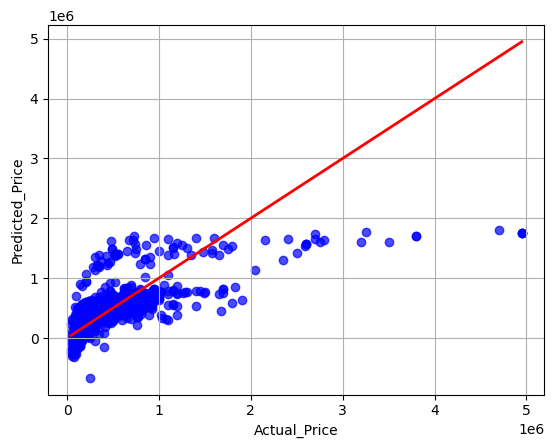

In [102]:
plt.scatter(y_test,y_pred,alpha=0.7,color='b')
plt.plot([y_test.min() , y_test.max()],[y_test.min() , y_test.max()],color='red',lw=2)
plt.grid(True)
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.show()

In [106]:
y_log = np.log1p(training_dataset['selling_price'])

In [110]:
X_train, X_test, y_train_log, y_test_log = train_test_split(x, y_log, test_size=0.2, random_state=40)

In [124]:
model = RandomForestRegressor(random_state=42)
model.fit(x_train_scaled, y_train_log)
y_pred_log = model.predict(x_test_scaled)
y_pred = np.expm1(y_pred_log)
y_test = np.expm1(y_test_log)
r2_rf = r2_score(y_test,y_pred)
mae_rf = mean_absolute_error(y_test,y_pred)


In [126]:
print(f'{r2_rf}')
print(f'{mae}')

0.8659130476651089
239119.8825211063


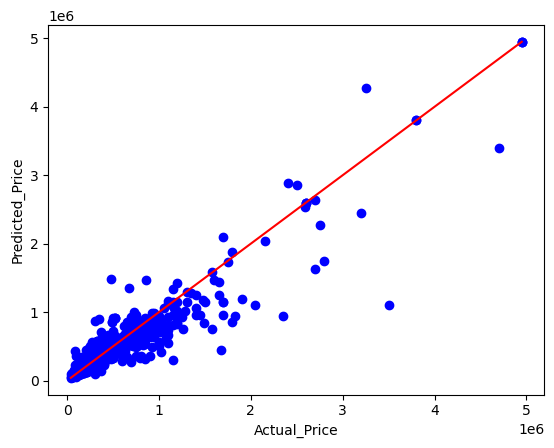

In [116]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual_Price')
plt.ylabel('Predicted_Price')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19236\546200257.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual_test)


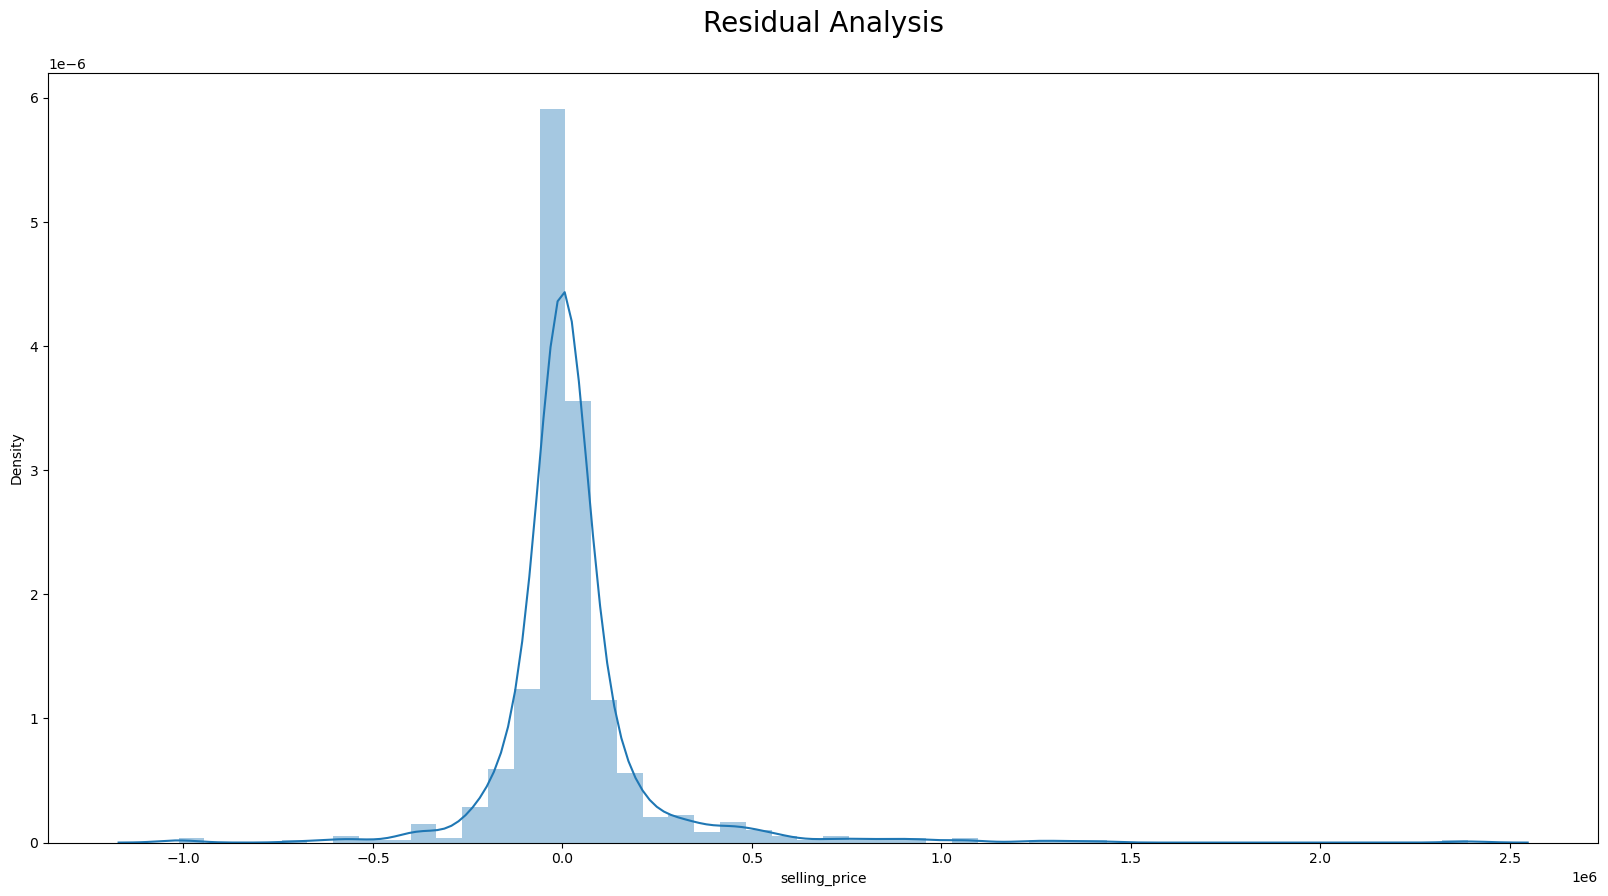

In [128]:
residual_test = y_test - y_pred
plt.figure(figsize=[20,10])
sns.distplot(residual_test)
plt.title('Residual Analysis\n', fontdict={'size':20})
plt.show()

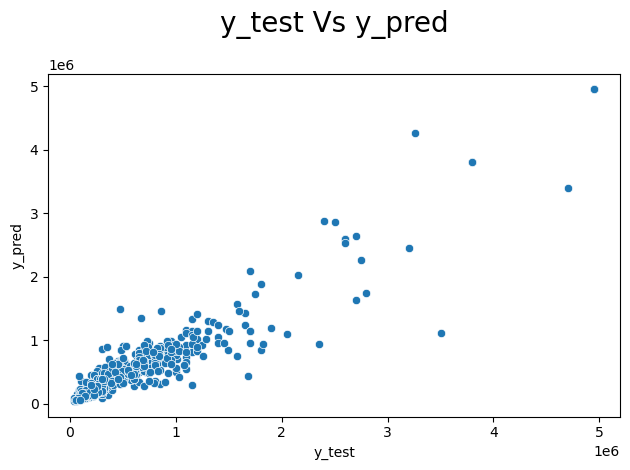

In [130]:
sns.scatterplot(x=y_test,y=y_pred)
plt.title('y_test Vs y_pred\n', fontsize=20)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.tight_layout()